# Neural networks

This notebook is supposed to be running on https://colab.research.google.com

Here you have a [link](https://colab.research.google.com/drive/1wbjX5XlIhOJDGwii6Hb2L6Se6s8q-p9R?usp=sharing) to colab version

## 1. Digits recognition

In [1]:
%tensorflow_version 2.x

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
matplotlib.pyplot.style.use('ggplot')
%matplotlib inline

### Data loading

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(y_train[0])

5


In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

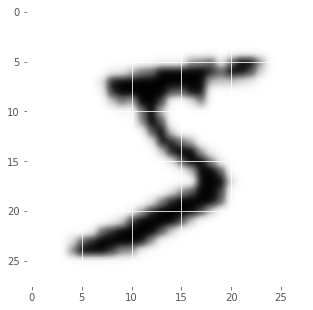

In [ ]:
plt.figure(figsize = (5, 6))
plt.imshow(X_train[0], cmap = 'Greys', interpolation = 'gaussian')

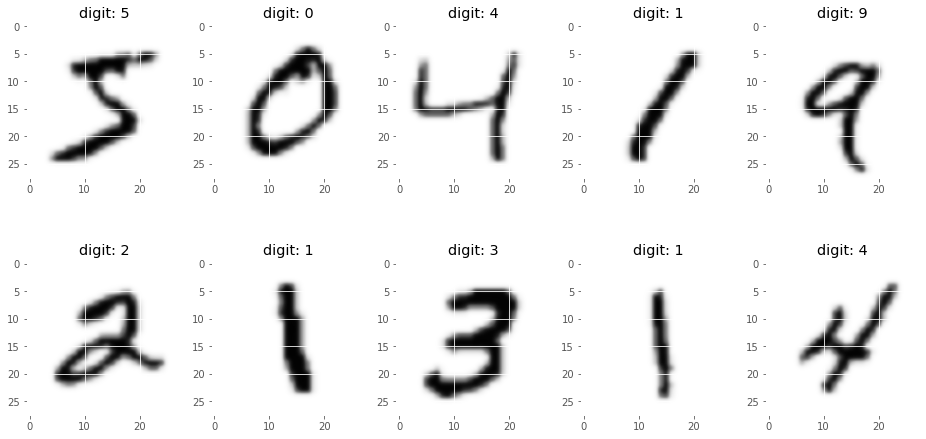

In [ ]:
plt.figure(figsize = (16, 8))

for plot_number, plot in enumerate(X_train[:10]):
    plt.subplot(2, 5, plot_number + 1)
    plt.imshow(plot, cmap = 'Greys', interpolation = 'gaussian')
    plt.title('digit: ' + str(y_train[plot_number]))

### Data preprocessing

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# Preprocess the data (these are NumPy arrays)
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [ ]:
# Reserve 10,000 samples for validation
X_val = X_train[-10000:]
y_val = y_train[-10000:]
X_train = X_train[:-10000]
y_train = y_train[:-10000]

### Model training

In [ ]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(layers.Dense(1024, activation="relu",  name="input"))
model.add(layers.Dense(128, activation="tanh",  name="dense_1"))
model.add(layers.Dropout(0.95))
model.add(layers.Dense(64, activation="relu",  name="dense_2"))
model.add(layers.Dense(10, activation="softmax",  name="output"))

In [ ]:
model.compile(
   optimizer='Adam',
   loss='categorical_crossentropy',
   metrics=['accuracy']
)

In [ ]:
history = model.fit(
   x = X_train,
   y = keras.utils.to_categorical(y_train),
   epochs = 10,
   batch_size = 64,
   shuffle = True,
   validation_data=(X_val, keras.utils.to_categorical(y_val))
)

Epoch 1/10
782/782 [==============================] - 8s 11ms/step - loss: 1.0173 - accuracy: 0.6479 - val_loss: 0.2022 - val_accuracy: 0.9451
Epoch 2/10
782/782 [==============================] - 8s 11ms/step - loss: 0.5269 - accuracy: 0.8225 - val_loss: 0.1453 - val_accuracy: 0.9597
Epoch 3/10
782/782 [==============================] - 9s 11ms/step - loss: 0.4113 - accuracy: 0.8590 - val_loss: 0.1439 - val_accuracy: 0.9608
Epoch 4/10
782/782 [==============================] - 8s 11ms/step - loss: 0.3578 - accuracy: 0.8769 - val_loss: 0.1270 - val_accuracy: 0.9687
Epoch 5/10
782/782 [==============================] - 9s 11ms/step - loss: 0.3167 - accuracy: 0.8895 - val_loss: 0.1260 - val_accuracy: 0.9686
Epoch 6/10
782/782 [==============================] - 8s 11ms/step - loss: 0.2872 - accuracy: 0.9002 - val_loss: 0.1173 - val_accuracy: 0.9713
Epoch 7/10
782/782 [==============================] - 8s 11ms/step - loss: 0.2668 - accuracy: 0.9065 - val_loss: 0.1192 - val_accuracy: 0.9724

### Quality estimation

In [ ]:
train_evaluation = model.evaluate(X_train, keras.utils.to_categorical(y_train))

1563/1563 [==============================] - 4s 3ms/step - loss: 0.0458 - accuracy: 0.9877


In [ ]:
test_evaluation = model.evaluate(X_test, keras.utils.to_categorical(y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.1290 - accuracy: 0.9704


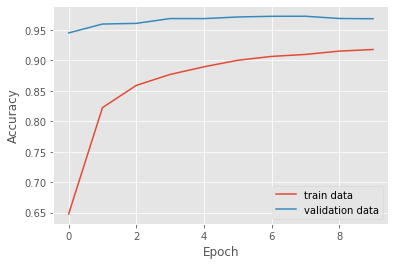

In [ ]:
plt.plot(history.history['accuracy'], label='train data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Text sentiment analysis [YELP](https://www.yelp.com/dataset/challenge) 


To speed up model training use GPU:
(Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU).

## Data loading

Original data: https://course.fast.ai/datasets 

Yelp Review Polarity Dataset

Version 1, Updated 09/09/2015

**ORIGIN**

The Yelp reviews dataset consists of reviews from Yelp. It is extracted from the Yelp Dataset Challenge 2015 data. For more information, please refer to http://www.yelp.com/dataset_challenge

The Yelp reviews polarity dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the above dataset. It is first used as a text classification benchmark in the following paper: Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advances in Neural Information Processing Systems 28 (NIPS 2015).


**DESCRIPTION**

The Yelp reviews polarity dataset is constructed by considering stars 1 and 2 negative, and 3 and 4 positive. For each polarity 280,000 training samples and 19,000 testing samples are take randomly. In total there are 560,000 trainig samples and 38,000 testing samples. Negative polarity is class 1, and positive class 2.

The files train.csv and test.csv contain all the training samples as comma-sparated values. There are 2 columns in them, corresponding to class index (1 and 2) and review text. The review texts are escaped using double quotes ("), and any internal double quote is escaped by 2 double quotes (""). New lines are escaped by a backslash followed with an "n" character, that is "\n".

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv("/content/drive/My Drive/MADE_ML/yelp_review_polarity_csv/train.csv",
                   header = None, names = ['target', 'data'])

In [5]:
test = pd.read_csv("/content/drive/My Drive/MADE_ML/yelp_review_polarity_csv/test.csv",
                   header = None, names = ['target', 'data'])

In [6]:
train.shape, test.shape

((560000, 2), (38000, 2))

In [7]:
train.head()

target                                               data
0       1  Unfortunately, the frustration of being Dr. Go...
1       2  Been going to Dr. Goldberg for over 10 years. ...
2       1  I don't know what Dr. Goldberg was like before...
3       1  I'm writing this review to give you a heads up...
4       2  All the food is great here. But the best thing...

### Data preprocessing
#### Target function

In [8]:
#Target function preprocessing: from 1(negative)/2(positive) to 0(negative)/1(positive)
train.target = train.target.apply(lambda x : x - 1)
test.target = test.target.apply(lambda x : x - 1)

In [9]:
train.target.value_counts()

1    280000
0    280000
Name: target, dtype: int64

In [10]:
test.target.value_counts()

1    19000
0    19000
Name: target, dtype: int64

#### Text tokenizing

In [11]:
#Tokenizer
number_of_words = 10000

tokenizer = keras.preprocessing.text.Tokenizer(num_words = number_of_words)

In [12]:
#fit tokenizer on train reviews only
tokenizer.fit_on_texts(train.data)

In [13]:
#word index
tokenizer.word_index.keys()

dict_keys(['the', 'and', 'i', 'to', 'a', 'was', 'of', 'it', 'for', 'in', 'is', 'n', 'that', 'my', 'we', 'this', 'but', 'with', 'they', 'you', 'on', 'not', 'have', 'had', 'at', 'were', 'so', 'are', 'food', 'be', 'place', 'me', 'there', 'good', 'as', 'out', 'all', 'like', 'if', 'just', 'our', 'very', 'get', 'one', 'here', 'time', 'when', 'up', 'or', 'from', 'great', 'service', 'would', 'back', 'their', 'about', 'no', 'go', 'an', 'what', 'really', 'he', "it's", 'she', 'which', 'will', 'some', 'only', 'been', 'us', 'your', 'because', 'more', 'even', 'can', 'them', 'by', "don't", 'got', 'other', 'after', 'do', 'nthe', 'also', 'ni', 'too', "didn't", 'never', 'ordered', 'did', 'well', 'nice', "i'm", 'over', 'has', 'order', 'then', 'went', 'than', 'people', 'could', 'came', 'much', 'restaurant', 'first', 'said', 'her', 'again', 'off', 'little', 'best', "i've", 'know', 'better', '2', 'going', 'how', 'who', 'way', 'two', 'try', 'love', 'make', 'come', 'chicken', 'pretty', 'room', 'always', 'staf

In [14]:
tokenizer.word_index['the']

1

In [15]:
#tokenize data
train_sequences = tokenizer.texts_to_sequences(train.data)
test_sequences = tokenizer.texts_to_sequences(test.data)

In [16]:
print(train.data[10])
print(train_sequences[10])

After waiting for almost 30 minutes to trade in an old phone part of the buy back program, our customer service rep incorrectly processed the transaction. This led to us waiting another 30 minutes for him to correct it. Don't visit this store if you want pleasant or good service.
[81, 317, 9, 326, 318, 130, 4, 3373, 10, 59, 254, 446, 377, 7, 1, 521, 54, 2975, 41, 218, 52, 3109, 5669, 3871, 1, 4055, 16, 3065, 4, 70, 317, 157, 318, 130, 9, 229, 4, 1448, 8, 78, 285, 16, 232, 39, 20, 140, 889, 49, 34, 52]


In [17]:
tokenizer.word_index['waiting']

317

In [18]:
#unify reviews length
max_review_length = 200

X_train = keras.preprocessing.sequence.pad_sequences(train_sequences, 
                                                     maxlen = max_review_length)
X_test = keras.preprocessing.sequence.pad_sequences(test_sequences,
                                                    maxlen = max_review_length)

In [ ]:
X_train[:3]

### Model trainig

In [20]:
model = keras.models.Sequential()

model.add(layers.Embedding(number_of_words, 64, input_length = max_review_length))
model.add(layers.LSTM(128))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [21]:
model.compile(optimizer = 'RMSProp', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [27]:
#Create a callback to save model at each epoche, if quality gets better

model_save_path = '/content/drive/My Drive/MADE_ML/yelp_lstm_best_model/saved_model.h5'

checkpoint_callback = keras.callbacks.ModelCheckpoint(model_save_path, 
                                      monitor = 'val_accuracy',
                                      save_best_only = True,
                                      verbose = 1)

In [28]:
history = model.fit(X_train, 
                    train.target, 
                    epochs = 3,
                    batch_size = 128,
                    validation_split = 0.1,
                    callbacks = [checkpoint_callback])

Epoch 1/3
3937/3938 [============================>.] - ETA: 0s - loss: 0.0899 - accuracy: 0.9668
Epoch 00001: val_accuracy improved from -inf to 0.96879, saving model to /content/drive/My Drive/MADE_ML/yelp_lstm_best_model/saved_model.h5
3938/3938 [==============================] - 80s 20ms/step - loss: 0.0899 - accuracy: 0.9668 - val_loss: 0.0874 - val_accuracy: 0.9688
Epoch 2/3
3936/3938 [============================>.] - ETA: 0s - loss: 0.0835 - accuracy: 0.9696
Epoch 00002: val_accuracy improved from 0.96879 to 0.96961, saving model to /content/drive/My Drive/MADE_ML/yelp_lstm_best_model/saved_model.h5
3938/3938 [==============================] - 80s 20ms/step - loss: 0.0835 - accuracy: 0.9696 - val_loss: 0.0840 - val_accuracy: 0.9696
Epoch 3/3
3937/3938 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.9720
Epoch 00003: val_accuracy did not improve from 0.96961
3938/3938 [==============================] - 79s 20ms/step - loss: 0.0776 - accuracy: 0.9720 - val_

### Quality estimation

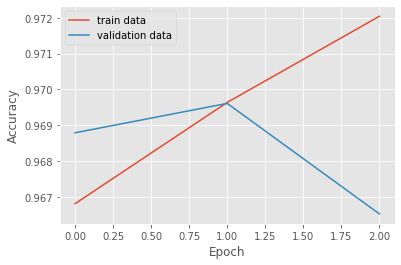

In [29]:
plt.plot(history.history['accuracy'], label='train data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
model.load_weights(model_save_path)

In [31]:
model.evaluate(X_train, train.target, verbose=1)

17500/17500 [==============================] - 88s 5ms/step - loss: 0.0727 - accuracy: 0.9743


[0.0727228969335556, 0.974307119846344]

In [32]:
model.evaluate(X_test, test.target, verbose=1)

1188/1188 [==============================] - 6s 5ms/step - loss: 0.1033 - accuracy: 0.9620


[0.10333605110645294, 0.9619736671447754]

In [33]:
my_review = '''This cozy restaurant has left the best impressions! 
Delicious dishes, beautiful presentation, wide wine list and wonderful dessert. 
I recommend to everyone! 
'''

my_tokenized_review = tokenizer.texts_to_sequences([my_review])

my_tokenized_review = keras.preprocessing.sequence.pad_sequences(my_tokenized_review, 
                                                     maxlen = max_review_length)

model.predict(my_tokenized_review)

array([[0.999736]], dtype=float32)